In [1]:
import pandas as var_pandas
import numpy as var_numpy
import matplotlib.pyplot as var_pyplot
from sklearn import linear_model as var_linear_model
import joblib as var_joblib

In [2]:
train_df = var_pandas.read_csv("../data/cbex-lr-home-prices-train.csv")
train_df

,area,price
0,1000,80000
1,1500,135000
2,2000,240000
3,2500,325000
4,3000,450000
5,3500,560000
6,4000,800000
7,4500,945000
8,5000,1100000
9,6000,1250000


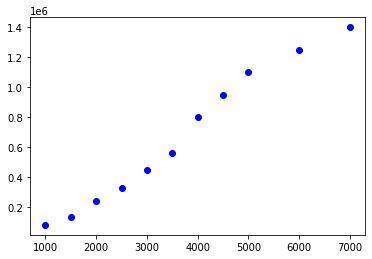

In [3]:
%matplotlib inline
var_pyplot.xlabel='area'
var_pyplot.ylabel='price'
var_pyplot.scatter(train_df.area, train_df.price, color='blue', marker='o')

In [4]:
var_model = var_linear_model.LinearRegression()
var_model.fit(train_df[['area']], train_df.price)
var_model

LinearRegression()

In [5]:
var_model.coef_, var_model.intercept_

(array([243.2544757]), -222289.00255754462)

In [6]:
var_joblib.dump(var_model, "../.outputs/.models/cbex-lr-home-prices-model.bindata")

['../.outputs/.models/cbex-lr-home-prices-model.bindata']

In [7]:
var_loaded_model = var_joblib.load("../.outputs/.models/cbex-lr-home-prices-model.bindata")
var_loaded_model.coef_, var_loaded_model.intercept_

(array([243.2544757]), -222289.00255754462)

Plot with trained in-memory model

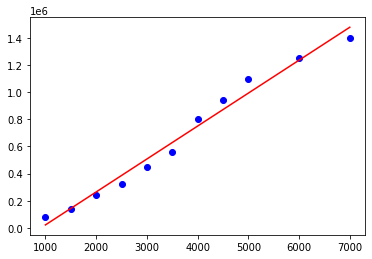

In [8]:
%matplotlib inline
var_pyplot.xlabel='area'
var_pyplot.ylabel='price'
var_pyplot.scatter(train_df.area, train_df.price, color='blue', marker='o')
var_pyplot.plot(train_df.area,var_model.predict(train_df[['area']]), color='red')

Plot with trained, persisted, loaded model

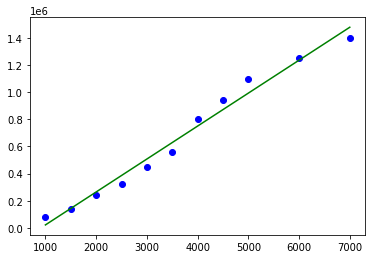

In [9]:
%matplotlib inline
var_pyplot.xlabel='area'
var_pyplot.ylabel='price'
var_pyplot.scatter(train_df.area, train_df.price, color='blue', marker='o')
var_pyplot.plot(train_df.area,var_loaded_model.predict(train_df[['area']]), color='green')

In [10]:
test_df = var_pandas.read_csv("../data/cbex-lr-home-prices-test.csv")
test_df.head(5)

,area
0,600
1,800
2,1200
3,2200
4,3700


In [11]:
predicted_prices_original_model = var_model.predict(test_df)
predicted_prices_loaded_model = var_loaded_model.predict(test_df)

test_df['predicted_price_original_model'] = predicted_prices_original_model
test_df['predicted_price_loaded_model'] = predicted_prices_loaded_model
test_df.to_csv("../.outputs/.test_results/cbex-lr-home-prices-test-results.csv", index=False)
test_df

,area,predicted_price_original_model,predicted_price_loaded_model
0,600,-7.633632e+04,-7.633632e+04
1,800,-2.768542e+04,-2.768542e+04
2,1200,6.961637e+04,6.961637e+04
3,2200,3.128708e+05,3.128708e+05
4,3700,6.777526e+05,6.777526e+05
5,5700,1.164262e+06,1.164262e+06
6,8200,1.772398e+06,1.772398e+06
7,1000,2.096547e+04,2.096547e+04
8,1500,1.425927e+05,1.425927e+05
9,2300,3.371963e+05,3.371963e+05
